In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# !pip install pytesseract # pytesseract 설치

In [ ]:
# !sudo apt install tesseract-ocr

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import os
import argparse
import cv2
import matplotlib.pyplot as plt
import math
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import shutil
import random
try:
 from PIL import Image
except ImportError:
 import Image

# import pytesseract
# from pytesseract import Output

In [ ]:
dh_dir = '/content/drive/My Drive/Colab Notebooks/OCR/image' # dir for Daehyun, Colab
# dh_dir='./image'  # dir for Daehyun, Jupyter notebook

os.chdir(dh_dir)

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/OCR/image'

In [ ]:
#이미지 가져오기

img = cv2.imread('cam6.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

print(f'shape:{img.shape}') #Shape: (3505, 2480, 3) BGR형식으로 이미지 로딩
print(f'dtype:{img.dtype}') #dtype: unint8(unsigned 8)

shape:(3509, 2480, 3)
dtype:uint8


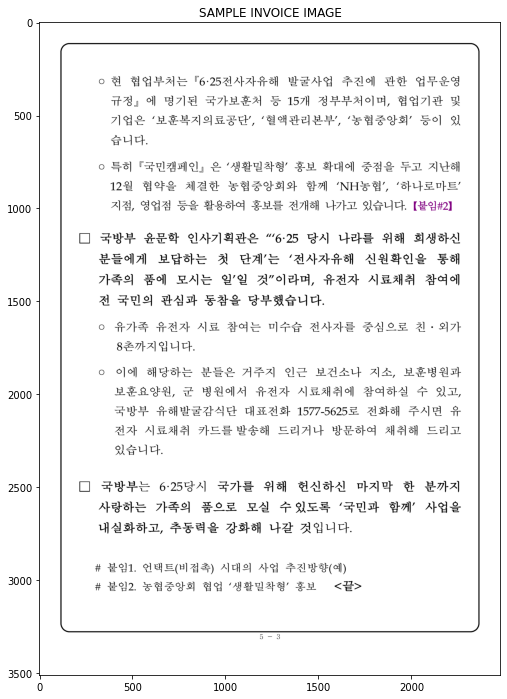

In [ ]:
# bgr 이미지를 rgb로 바꿔줌

b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

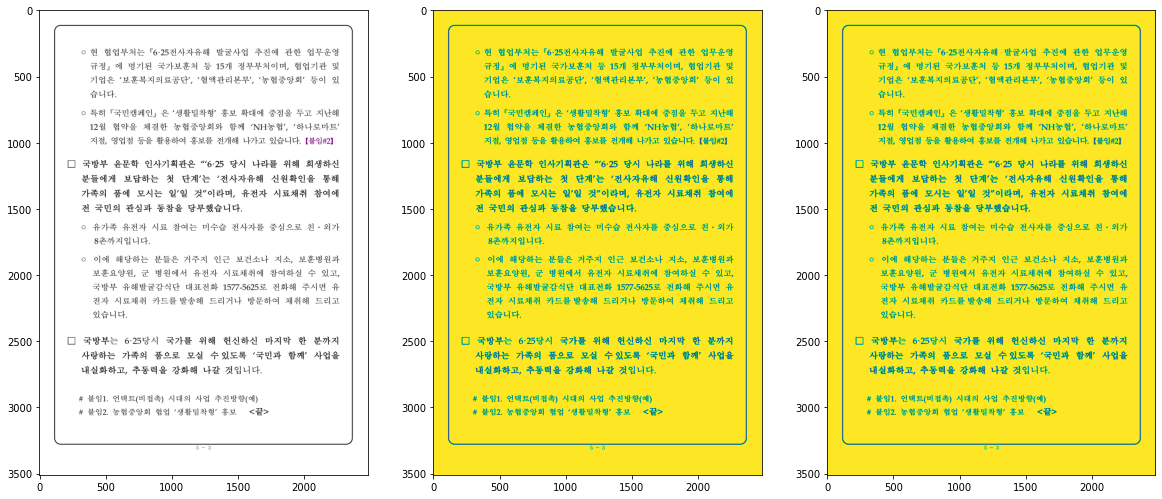

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(20,15))
axes[0].imshow(img)
axes[1].imshow(img_gray)
axes[2].imshow(img_blur)
plt.show()

# Textline Box made by pytesseract

In [ ]:
# Plot character boxes on image using pytesseract.image_to_boxes() function
# pytesseract의 image_to_boxes 함수 이용한 결과
image = 'cam1.png'
output = '/content/drive/My Drive/Colab Notebooks/OCR/output/'
img = cv2.imread(image)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img_blur)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

In [ ]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imwrite(output+image[:-4]+'_pyt_box.png',rgb_img)

True

In [ ]:
# plt.figure(figsize=(25,20))
# plt.imshow(rgb_img)
# plt.title('SAMPLE IMAGE WITH CHARACTER LEVEL BOXES')
# plt.show()

In [ ]:
# Plot word boxes on image using pytesseract.image_to_data() function
# pytessearct의 image_to_data 함수 이용

img = cv2.imread('cam1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

d = pytesseract.image_to_data(img_blur, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 70%
    if int(d['conf'][i]) >0:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


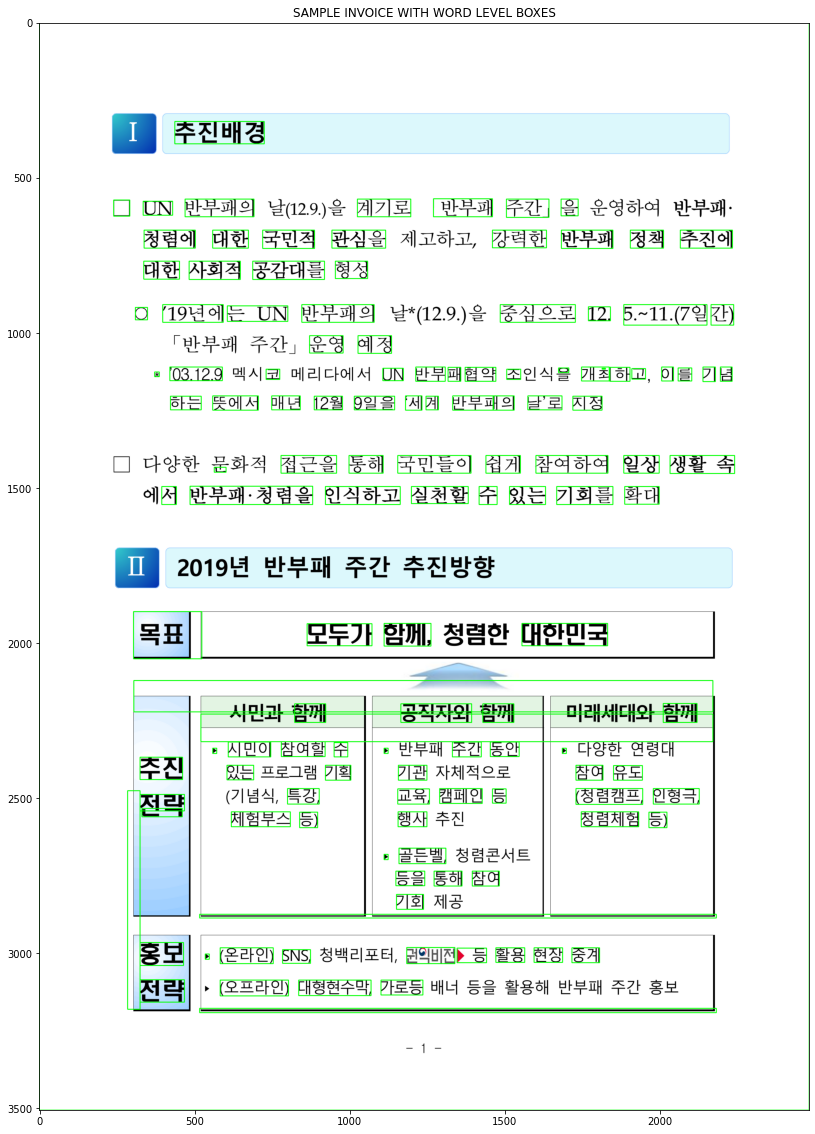

In [ ]:
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(25,20))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

In [ ]:
# b,g,r = cv2.split(image)
# rgb_img = cv2.merge([r,g,b])
# plt.figure(figsize=(16,12))
# plt.imshow(rgb_img)
# plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
# plt.show()

In [ ]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imwrite(output+image[:-4]+'_pyt_data.png',rgb_img)

True

['',
 '',
 '',
 '',
 'BSS',
 'ARMS',
 '',
 'Cl)',
 'Sst',
 'nn',
 '',
 '',
 '',
 'a',
 'ae',
 'ie',
 'Os)',
 'elsh',
 'Ak',
 'it',
 'Se',
 'Al',
 '',
 '',
 '',
 '20)',
 'FIBLABE',
 'Resa',
 'gsol',
 'eS',
 'ASwsAt',
 '30)',
 'Poll',
 '',
 'chy',
 'ABATE',
 '=o)',
 'Sea',
 '§',
 'PES',
 '6|',
 'SETA',
 'iS',
 '',
 '',
 '',
 'HS',
 'AABPe',
 'AMA',
 'shall]',
 'rez',
 'Se!',
 'Mek',
 'S|',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'L=P-2',
 '',
 '<a',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 'oO',
 '',
 'SIA)',
 'o',
 '79)',
 '2)',
 'B)',
 '(EF)',
 '14.00',
 '~',
 '600',
 '',
 'AIS',
 '»',
 'KTAAAAPSOR',
 'AA',
 'Ae',
 'EEE)',
 '160)',
 '',
 'SA:',
 'MR',
 'Seas,',
 'aes',
 'AA',
 'Ma)',
 '',
 '',
 'SASHES]',
 'RUA)',
 'ZAH',
 'REN',
 'SIRH',
 'fe',
 '',
 '',
 '0',
 'eens',
 '',
 'HSAs',
 'ARASAE',
 'B',
 'Sieh',
 '',
 'O',
 'ere',
 '7b',
 'ies',
 'RSS',
 'Abe',
 '2zh',
 'aoe',
 'Pe',
 '7]',
 'zt',
 '',
 '',
 '',
 '0',
 'BIS',
 'AAKS!',


# Textline Box made by myself

In [ ]:

from google.colab.patches import cv2_imshow
img = cv2.imread('cam4.png')

large = img
rgb = cv2.pyrDown(large)
# cv2.pyrDown 함수는 입력 이미지를 50% 크기로 줄인 이미지를 생성해 반환,
# cv2.pryUp은 입력 이미지를 200% 크기로 확대한 이미지를 생성해 반환

small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# GRAY로 변환
small = cv2.GaussianBlur(small, (5, 5), 0)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
# 타원형 3X3의 kernel matrix 생성
# MORPH_RECT, CROSS, ELLIPSE

grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)
# 위의 방식은 노이즈 제거하기 위함임
# erosion은 이미지를 가늘게, dilation은 이미지를 굵게 만들어 줌
# Opening: erosion 수행 후, 바로 dilation을 수행하여 본래 이미지 크기로 돌려 놓는 것
# Closing: dialation 수행 후, 바로 erosion을 수행하는 방식
# cv2.MORPH_OPEN: Opening 수행
# cv2.MORPH_CLOSE: Closing 수행
# cv2.MORPH_GRADIENT: Dilation 이미지와 Erosion 이미지의 차이를 나타냄
# cv2.MORPH_TOPHAT: 원본 이미지와 opening한 이미지의 차이를 나타냄
# cv2.MORPH_BLACKHAT: closing한 이미지와 원본 이미지의 차이를 나타냄

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# threshold 설정

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.RETR_TREE: 두번째 인자는 contour 추출 모드이며, 2번째 리턴값인 hierachy의 값에 영향을 줌
# cv2.RETR_EXTERNAL: 이미지의 가장 바깥쪽의 contour만 추출
# cv2.RETR_LIST: 간 계층구조 상관관계를 고려하지 않고 contour를 추출
# cv2.CHAIN_APPROX_NONE: contour를 구성하는 모든 점을 저장함.
# cv2.CHAIN_APPROX__SIMPLE: contour의 수평,수직, 대각선 방향의 점은 모두 버리고 끝점만 남겨둠

img_for_class=rgb.copy()
img_result=[]
margin_pixel=0

mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    # img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
    #                      x-margin_pixel : x+w+margin_pixel])
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    # r > 0.45 and 
    if w > 20 and h > 20 and r<0.9:
        img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
                                        x-margin_pixel : x+w+margin_pixel])
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
# show image with contours rect


plt.figure(figsize=(16,12))
plt.imshow(rgb)
# cv2.waitKey()




In [ ]:
# plt.figure(figsize=(20,15))
# plt.imshow(mask)

(25, 23, 3)


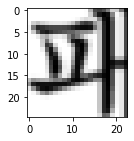

In [ ]:
plt.figure(figsize=(4,2))
plt.imshow(img_result[57])
print(img_result[57].shape)

In [ ]:
# cv2.imwrite('text.jpg',img_result[0])

cv2.imwrite('text.jpg',img_result[7])
  


True

# 음절추출 부분

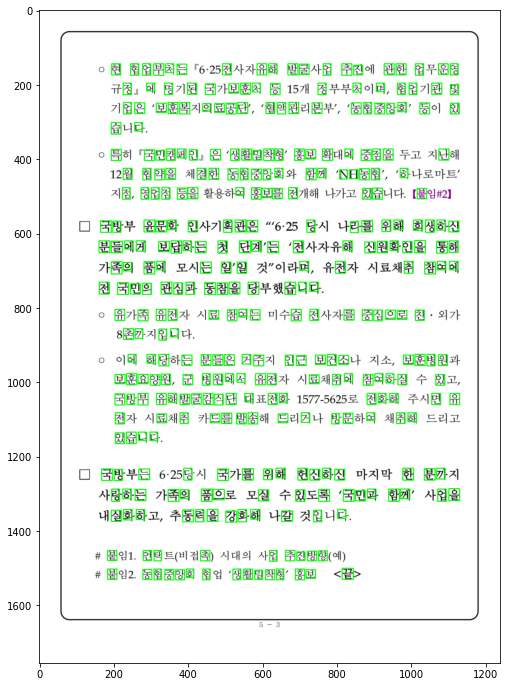

In [ ]:

# from google.colab.patches import cv2_imshow
img = cv2.imread('cam4.png')

large = img
rgb = cv2.pyrDown(large)
# rgb=large
# cv2.pyrDown 함수는 입력 이미지를 50% 크기로 줄인 이미지를 생성해 반환,
# cv2.pryUp은 입력 이미지를 200% 크기로 확대한 이미지를 생성해 반환

small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# small=cv2.GaussianBlur(small,(5,5),0)
# GRAY로 변환

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
# 타원형 3X3의 kernel matrix 생성

grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# threshold 설정

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 9))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)


# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.RETR_TREE: 두번째 인자는 contour 추출 모드이며, 2번째 리턴값인 hierachy의 값에 영향을 줌
# cv2.RETR_EXTERNAL: 이미지의 가장 바깥쪽의 contour만 추출
# cv2.RETR_LIST: 간 계층구조 상관관계를 고려하지 않고 contour를 추출
# cv2.CHAIN_APPROX_NONE: contour를 구성하는 모든 점을 저장함.
# cv2.CHAIN_APPROX__SIMPLE: contour의 수평,수직, 대각선 방향의 점은 모두 버리고 끝점만 남겨둠

img_for_class=rgb.copy()
img_result=[]
margin_pixel=0

mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0

    # img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
    #                      x-margin_pixel : x+w+margin_pixel])
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    bi=float(w/h)
    if (w > 20 and h > 20) and w<35 and h<35 and r<0.8 and bi<1.1:
        img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
                                        x-margin_pixel : x+w+margin_pixel])
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
# show image with contours rect


plt.figure(figsize=(16,12))
plt.imshow(rgb)
# cv2.waitKey()




# Practice code (for graph detecting)

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('cam4.png')

large = img
rgb = cv2.pyrDown(large)
# cv2.pyrDown 함수는 입력 이미지를 50% 크기로 줄인 이미지를 생성해 반환,
# cv2.pryUp은 입력 이미지를 200% 크기로 확대한 이미지를 생성해 반환

small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# GRAY로 변환
small = cv2.GaussianBlur(small, (5, 5), 0)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
# 타원형 3X3의 kernel matrix 생성
# MORPH_RECT, CROSS, ELLIPSE

grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)
# 위의 방식은 노이즈 제거하기 위함임
# erosion은 이미지를 가늘게, dilation은 이미지를 굵게 만들어 줌
# Opening: erosion 수행 후, 바로 dilation을 수행하여 본래 이미지 크기로 돌려 놓는 것
# Closing: dialation 수행 후, 바로 erosion을 수행하는 방식
# cv2.MORPH_OPEN: Opening 수행
# cv2.MORPH_CLOSE: Closing 수행
# cv2.MORPH_GRADIENT: Dilation 이미지와 Erosion 이미지의 차이를 나타냄
# cv2.MORPH_TOPHAT: 원본 이미지와 opening한 이미지의 차이를 나타냄
# cv2.MORPH_BLACKHAT: closing한 이미지와 원본 이미지의 차이를 나타냄

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# threshold 설정

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.RETR_TREE: 두번째 인자는 contour 추출 모드이며, 2번째 리턴값인 hierachy의 값에 영향을 줌
# cv2.RETR_EXTERNAL: 이미지의 가장 바깥쪽의 contour만 추출
# cv2.RETR_LIST: 간 계층구조 상관관계를 고려하지 않고 contour를 추출
# cv2.CHAIN_APPROX_NONE: contour를 구성하는 모든 점을 저장함.
# cv2.CHAIN_APPROX__SIMPLE: contour의 수평,수직, 대각선 방향의 점은 모두 버리고 끝점만 남겨둠

img_for_class=rgb.copy()
img_result=[]
margin_pixel=0

mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    # img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
    #                      x-margin_pixel : x+w+margin_pixel])
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    # r > 0.45 and 
    if w > 20 and h > 20 and r<0.9:
        img_result.append(img_for_class[y-margin_pixel : y+h+margin_pixel,
                                        x-margin_pixel : x+w+margin_pixel])
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
# show image with contours rect


plt.figure(figsize=(16,12))
plt.imshow(rgb)
# cv2.waitKey()




1

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('cam4.png')

large = img
rgb = cv2.pyrDown(large)
# cv2.pyrDown 함수는 입력 이미지를 50% 크기로 줄인 이미지를 생성해 반환,
# cv2.pryUp은 입력 이미지를 200% 크기로 확대한 이미지를 생성해 반환

small = cv2.cvtColor(large, cv2.COLOR_BGR2GRAY)
# GRAY로 변환
small = cv2.GaussianBlur(small, (5, 5), 0)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

kernel_grad = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_grad2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
kernel_ero = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 타원형 3X3의 kernel matrix 생성
# MORPH_RECT, CROSS, ELLIPSE

ero=cv2.erode(small,kernel_ero,iterations=1)
dil=cv2.dilate(small,kernel_dil,iterations=1)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel_grad)
grad2 = cv2.morphologyEx(grad,cv2.MORPH_GRADIENT,kernel_grad2)
_, bw = cv2.threshold(grad2, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)




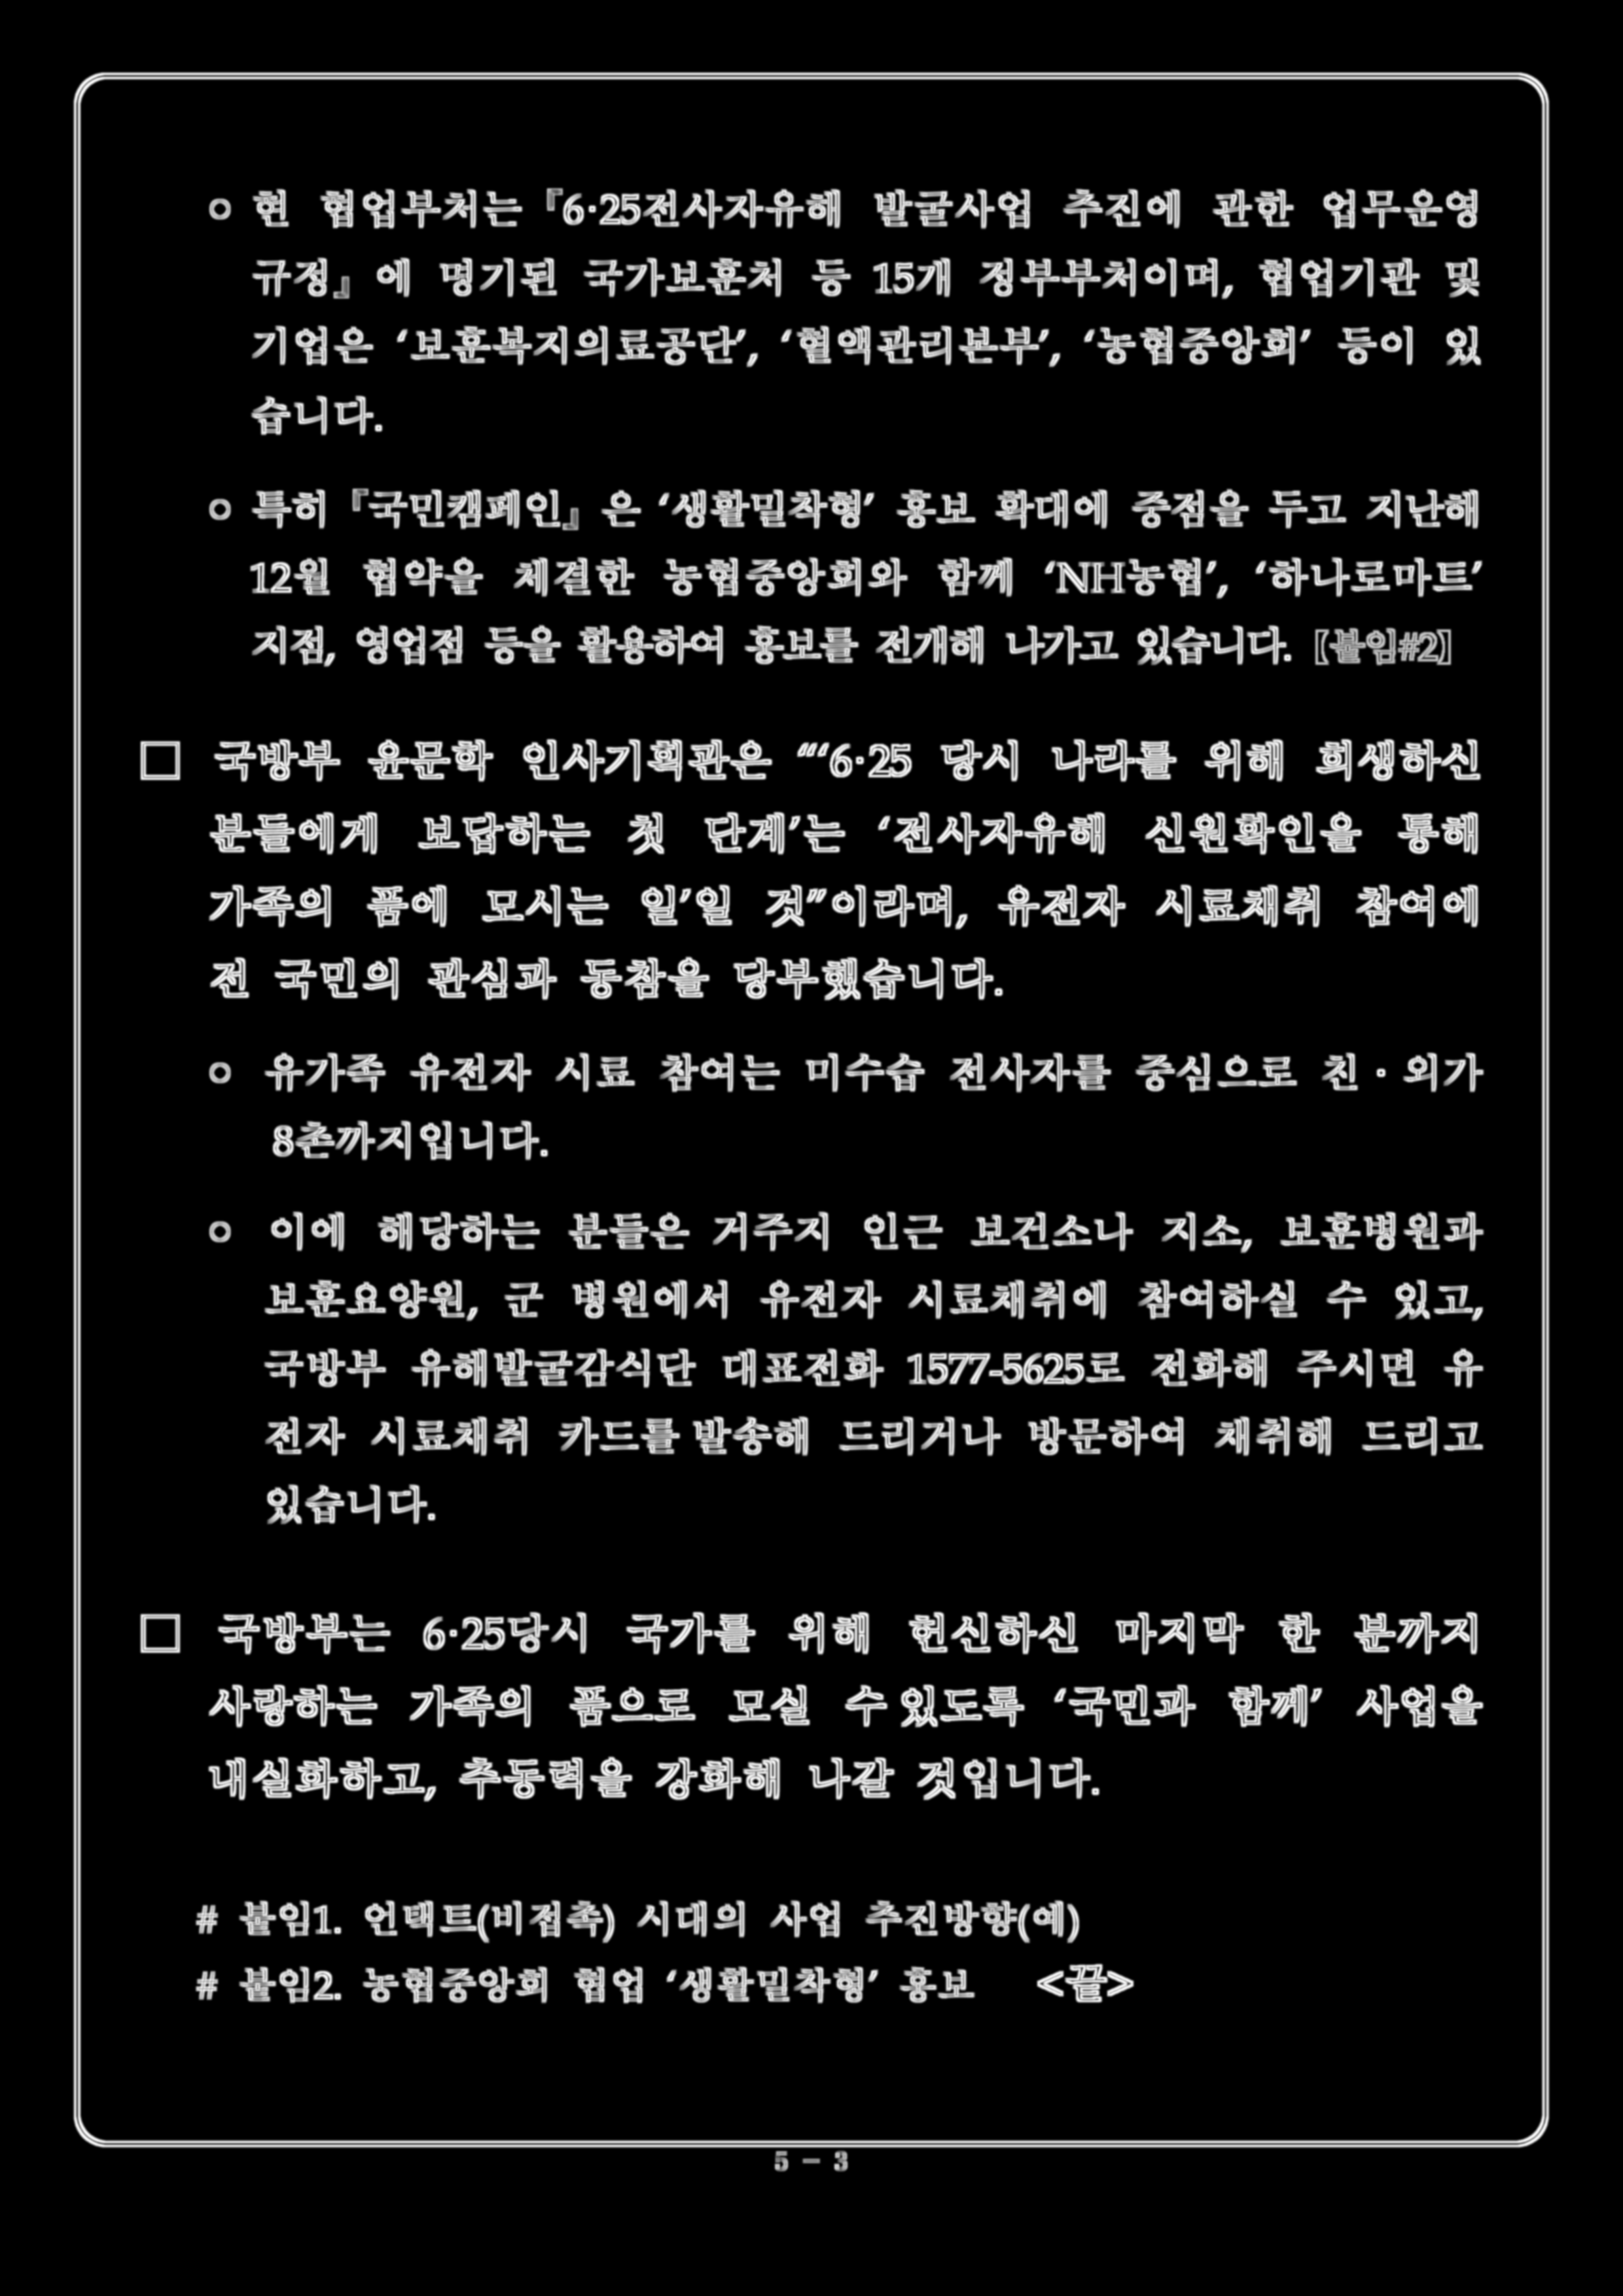

In [ ]:
cv2_imshow(cv2.GaussianBlur(grad,(5,5),0))
# cv2_imshow(grad)